In [3]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
import joblib

# Import packages for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for sentiment analysis
from textblob import TextBlob
from transformers import pipeline

In [4]:
data = pd.read_csv("processed_data-v2.csv")
model = joblib.load("misinformation_pipeline-v2.pkl")

1. Add sentiment analysis

In [5]:
data['sentiment'] = data['video_transcription_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

2. Add emotion analysis

In [ ]:
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")
data['emotion'] = data['video_transcription_text'].apply(lambda x: emotion_analyzer(x)[0]['label'])

Device set to use cpu


3. Integrating sentiment and and emotion with misinformation model

In [7]:
data['combined_features'] = data['text_length'].astype(str) + " " + data['sentiment'].astype(str) + " " + data['emotion']

4. Visualising results

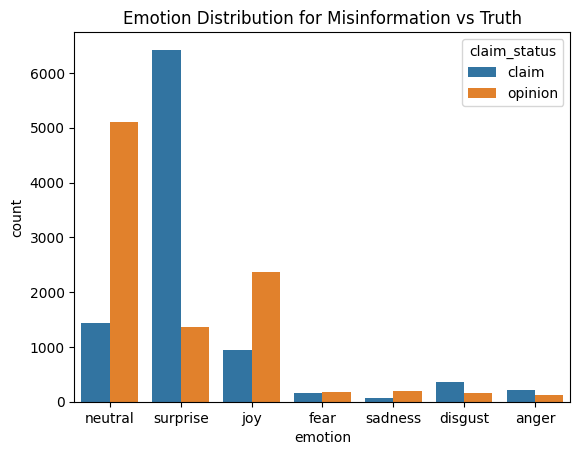

In [8]:
sns.countplot(data=data, x='emotion', hue='claim_status')
plt.title("Emotion Distribution for Misinformation vs Truth")
plt.show()

In [11]:
from transformers import pipeline
import joblib

# Load the pre-trained emotion analysis model
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Save the emotion analyzer using joblib
joblib.dump(emotion_analyzer, "emotion_analyzer.pkl")

Device set to use cpu


['emotion_analyzer.pkl']